# Implementing MLPs with Keras

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train/255.,  X_valid/255., X_test/255.

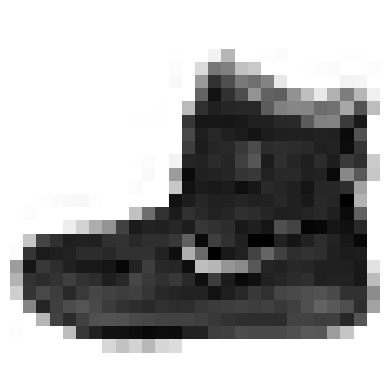

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [ ]:
class_names = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

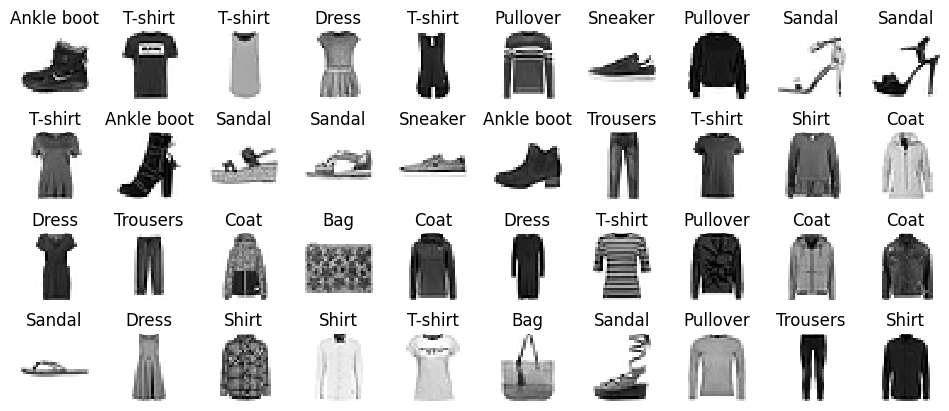

In [ ]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols*row+col
    plt.subplot(n_rows,n_cols, index+1)
    plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

# Tensorflow Sequential API

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()  #ardicil olmagi
model.add(tf.keras.layers.Input(shape=[28,28]))  # add - modelin icine layer elave etmeye
model.add(tf.keras.layers.Flatten())  #vektora cevirir shape-i
model.add(tf.keras.layers.Dense(300, activation='relu'))  #activation xetti olmayan elaqeni oyrenmeye
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #outputda 10 class oldugu ucun sonda 10neyron yaradilir,
# multiclass olur deye softmax isledirik

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session() #adi deyismeye qoymur

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

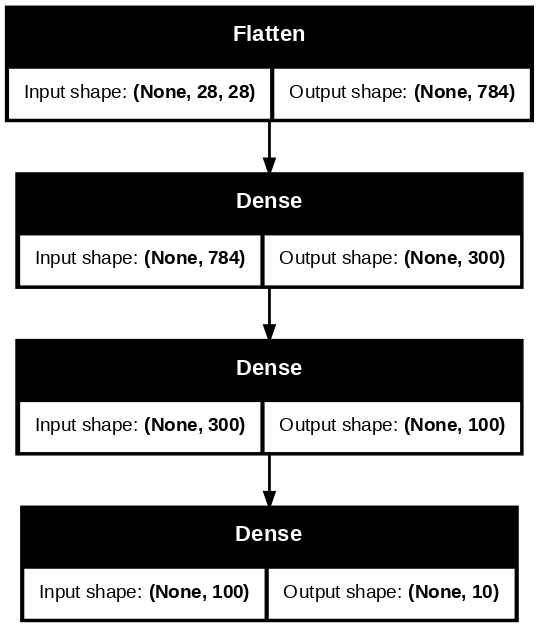

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=100)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02489426,  0.06881018, -0.00452175, ...,  0.03089657,
         0.02992372,  0.03429804],
       [-0.05549302,  0.00389654, -0.05013569, ...,  0.04474901,
        -0.03096281, -0.00799967],
       [ 0.05725475, -0.02614838,  0.06023158, ..., -0.06487026,
         0.02968723,  0.07163137],
       ...,
       [-0.06325331, -0.02081344, -0.0242143 , ..., -0.06939552,
         0.0672321 , -0.00818073],
       [ 0.0120045 ,  0.0083487 ,  0.06139573, ..., -0.01745765,
        -0.03275415, -0.0583836 ],
       [ 0.06964567, -0.01636604,  0.01596247, ...,  0.07081945,
        -0.06720935, -0.00927408]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Compiling the model

In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [ ]:
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.sparse_categorical_accuracy]
)

In [ ]:
tf.keras.utils.to_categorical((0,5, 1,0), num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# import numpy as np

# np.array(
#     [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
#        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
#        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
#     axis=1
# )

# Training and evaluating the model

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.9633 - sparse_categorical_accuracy: 0.6953 - val_loss: 0.5052 - val_sparse_categorical_accuracy: 0.8296
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.5062 - sparse_categorical_accuracy: 0.8253 - val_loss: 0.4557 - val_sparse_categorical_accuracy: 0.8382
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4541 - sparse_categorical_accuracy: 0.8438 - val_loss: 0.4336 - val_sparse_categorical_accuracy: 0.8444
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4239 - sparse_categorical_accuracy: 0.8539 - val_loss: 0.4168 - val_sparse_categorical_accuracy: 0.8492
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4022 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.4063 - val_sparse_categorical_accuracy: 0.8524
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3853 - sparse_categorical_accuracy: 0.8644 - val_loss: 0.3967 - val_sparse_categorical_accuracy

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history

{'loss': [0.7023531198501587,
  0.4867214560508728,
  0.44262799620628357,
  0.41544127464294434,
  0.39544662833213806,
  0.3797595798969269,
  0.3664644956588745,
  0.354906290769577,
  0.3446034789085388,
  0.33521395921707153,
  0.326431542634964,
  0.31840458512306213,
  0.3108135163784027,
  0.3037109375,
  0.29706433415412903,
  0.2909354865550995,
  0.28509530425071716,
  0.2795526385307312,
  0.2740865647792816,
  0.2690369784832001,
  0.2640068829059601,
  0.25915107131004333,
  0.25455519556999207,
  0.24997466802597046,
  0.24554255604743958,
  0.24119623005390167,
  0.23707623779773712,
  0.23297002911567688,
  0.22895461320877075,
  0.22507423162460327],
 'sparse_categorical_accuracy': [0.7662909030914307,
  0.8308181762695312,
  0.8466545343399048,
  0.8553636074066162,
  0.861018180847168,
  0.8661817908287048,
  0.8702545166015625,
  0.8737636208534241,
  0.8772545456886292,
  0.8805636167526245,
  0.8831999897956848,
  0.8859817981719971,
  0.8886181712150574,
  0.890

<Figure size 800x400 with 0 Axes>

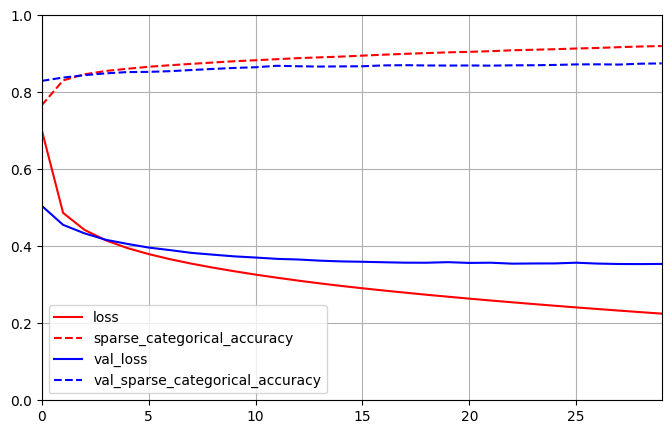

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize = (8,4))
pd.DataFrame(history.history).plot(figsize = (8,5), xlim=[0,29], ylim=[0,1], grid=True,
                                   style=['r-', 'r--', 'b-', 'b--'], label=True)

plt.legend(loc = 'lower left')
plt.show()

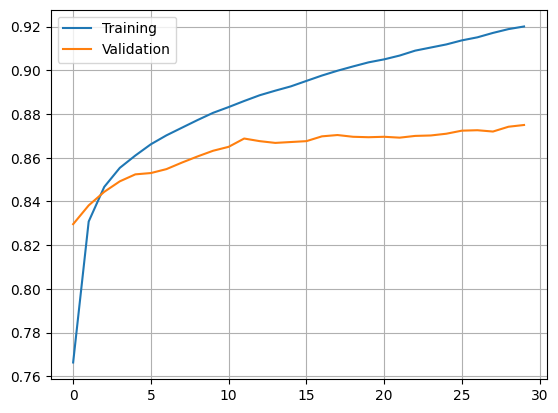

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'], label = 'Training')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'Validation')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3685 - sparse_categorical_accuracy: 0.8752


[0.3684535026550293, 0.8744999766349792]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.01, 0.  , 0.88],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trousers'], dtype='<U10')

In [ ]:
class_names[5]

'Sandal'

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

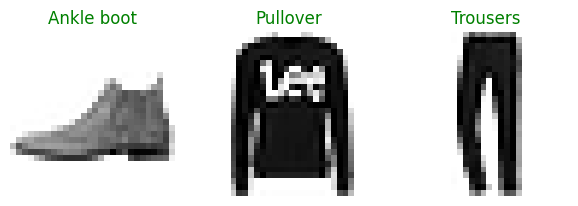

In [ ]:
plt.figure(figsize= (7.2,2.4))
for index, image in enumerate(X_new):
  plt.subplot(1,3,index+1)
  plt.imshow(image, cmap='binary', interpolation='nearest')
  plt.axis('off')
  plt.title(class_names[y_new[index]], fontsize=12, c='g' if y_pred[index] == y_new[index] else 'r')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Regression with MLP

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

norm_layer = tf.keras.layers.Normalization()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[8]),
    norm_layer,
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

norm_layer.adapt(X_train)
model.compile(loss='mse', optimizer='sgd', metrics=['RootMeanSquaredError'])
history = model.fit(X_train, y_train, epochs=29, validation_data=(X_valid, y_valid))

Epoch 1/29
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 1.0536 - loss: 1.1832 - val_RootMeanSquaredError: 1.5255 - val_loss: 2.3270
Epoch 2/29
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6915 - loss: 0.4786 - val_RootMeanSquaredError: 1.6673 - val_loss: 2.7798
Epoch 3/29
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6594 - loss: 0.4350 - val_RootMeanSquaredError: 0.6710 - val_loss: 0.4502
Epoch 4/29
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6383 - loss: 0.4077 - val_RootMeanSquaredError: 0.5961 - val_loss: 0.3553
Epoch 5/29
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6259 - loss: 0.3920 - val_RootMeanSquaredError: 0.5969 - val_loss: 0.3563
Epoch 6/29
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6207 - loss: 0.3855 - val_RootMeanSquaredError: 0.6011 - val_loss: 0.3613
Epoch 7/29
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6159 - los

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250 (4.89 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 2 (12.00 B)

# Functional API

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2= tf.keras.layers.Dense(30, activation = 'relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=[8])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs = [input_], outputs = [output])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 8)              │             17 │ input_layer_1[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 30)             │            270 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 30)             │            930 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization_1[0][0], │
│                           │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

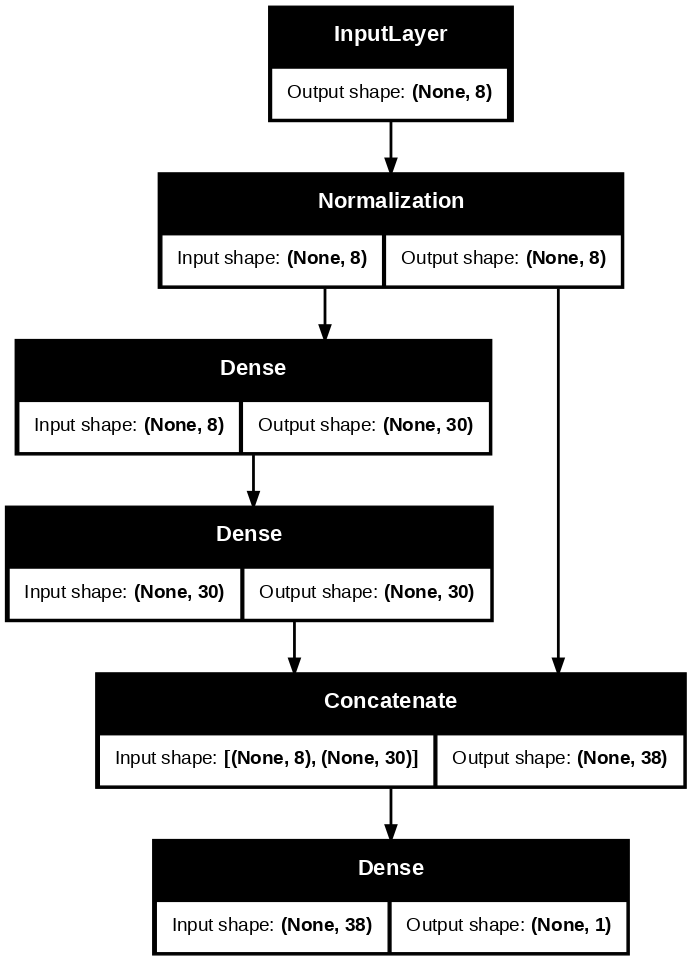

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=100)

In [ ]:
normalization_layer.adapt(X_train)
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_5']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 1.4923 - loss: 2.3387 - val_RootMeanSquaredError: 2.6390 - val_loss: 6.9644
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7393 - loss: 0.5480 - val_RootMeanSquaredError: 1.7089 - val_loss: 2.9204
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6512 - loss: 0.4243 - val_RootMeanSquaredError: 1.0040 - val_loss: 1.0081
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6251 - loss: 0.3909 - val_RootMeanSquaredError: 0.6432 - val_loss: 0.4137
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6100 - loss: 0.3723 - val_RootMeanSquaredError: 0.6185 - val_loss: 0.3826
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5996 - loss: 0.3596 - val_RootMeanSquaredError: 0.6079 - val_loss: 0.3696
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5923 - loss: 0.3510 -

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5])   #0-4 features
input_deep = tf.keras.layers.Input(shape=[6]) #2-7 features
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
outputs = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs= [input_wide, input_deep], outputs=[outputs])

In [ ]:
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['RootMeanSquaredError'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep. adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - RootMeanSquaredError: 1.6911 - loss: 2.9714 - val_RootMeanSquaredError: 0.9093 - val_loss: 0.8267
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8838 - loss: 0.7824 - val_RootMeanSquaredError: 0.8758 - val_loss: 0.7669
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7694 - loss: 0.5924 - val_RootMeanSquaredError: 0.7657 - val_loss: 0.5863
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7008 - loss: 0.4915 - val_RootMeanSquaredError: 0.6337 - val_loss: 0.4015
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6558 - loss: 0.4303 - val_RootMeanSquaredError: 0.7982 - val_loss: 0.6371
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6316 - loss: 0.3991 - val_RootMeanSquaredError: 0.9240 - val_loss: 0.8537
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6187 - los

In [ ]:
X_test_wide.shape, y_test.shape

((5160, 5), (5160,))

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])

normalization_layer_wide = tf.keras.layers.Normalization()
normalization_layer_deep = tf.keras.layers.Normalization()

norm_wide = normalization_layer_wide(input_wide)
norm_deep = normalization_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden1])
output_wide = tf.keras.layers.Dense(1)(concat)
output_deep = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output_wide, output_deep])

In [ ]:
model.compile(loss=('mse', 'mse'),
              optimizer = tf.keras.optimizers.Adam(1e-3), loss_weights=[0.9, 0.1],
              metrics = ['RootMeanSquaredError', 'RootMeanSquaredError'], )

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
mse_test = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - dense_2_RootMeanSquaredError: 150.6030 - dense_2_loss: 28784.6562 - dense_3_RootMeanSquaredError: 58.4708 - dense_3_loss: 4861.1792 - loss: 26392.3379 - val_dense_2_RootMeanSquaredError: 5.1381 - val_dense_2_loss: 26.3889 - val_dense_3_RootMeanSquaredError: 1.4745 - val_dense_3_loss: 2.1736 - val_loss: 23.9777
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - dense_2_RootMeanSquaredError: 2.1917 - dense_2_loss: 4.8081 - dense_3_RootMeanSquaredError: 1.3195 - dense_3_loss: 1.7421 - loss: 4.5015 - val_dense_2_RootMeanSquaredError: 4.7265 - val_dense_2_loss: 22.3309 - val_dense_3_RootMeanSquaredError: 1.3075 - val_dense_3_loss: 1.7093 - val_loss: 20.2770
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - dense_2_RootMeanSquaredError: 2.0950 - dense_2_loss: 4.3913 - dense_3_RootMeanSquaredError: 1.2875 - dense_3_loss: 1.6577 - loss: 4.1180 - val_dense_2_RootMeanSquaredError: 4.1548 - val_dense_2_loss: 17.2550 - val_dense_3_RootMe

# Using Subclassing API to build Dynamic Models

In [ ]:
@tf.keras.utils.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.norm_layer_wide = tf.keras.layers.Normalization()
    self.norm_layer_deep = tf.keras.layers.Normalization()
    self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
    self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
    self.main_output = tf.keras.layers.Dense(1)
    self.aux_output = tf.keras.layers.Dense(1)


  def call(self, inputs):
    input_wide, input_deep = inputs
    norm_wide = self.norm_layer_wide(input_wide)
    norm_deep = self.norm_layer_deep(input_deep)
    hidden1 = self.hidden1(norm_deep)
    hidden2 = self.hidden2(hidden1)
    concat = tf.keras.layers.concatenate([norm_wide, hidden2])
    output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return output, aux_output

model = WideAndDeepModel(30, activation='relu', name = 'my_cool_model')

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=['mse', 'mse'],
              loss_weights=[0.9,0.1], optimizer = optimizer,
              metrics = ['RootMeanSquaredError', 'RootMeanSquaredError'])

model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), (y_train,y_train), epochs=10,
                    validation_data = ((X_valid_wide,X_valid_deep),(y_valid, y_valid)))

eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - RootMeanSquaredError: 1.7801 - RootMeanSquaredError_1: 1.8765 - loss: 3.3191 - mse_loss: 3.5886 - val_RootMeanSquaredError: 1.1643 - val_RootMeanSquaredError_1: 1.0439 - val_loss: 1.3291 - val_mse_loss: 1.0896
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 0.8319 - RootMeanSquaredError_1: 0.9813 - loss: 0.7206 - mse_loss: 0.9644 - val_RootMeanSquaredError: 0.8911 - val_RootMeanSquaredError_1: 0.8469 - val_loss: 0.7864 - val_mse_loss: 0.7172
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7219 - RootMeanSquaredError_1: 0.8309 - loss: 0.5383 - mse_loss: 0.6906 - val_RootMeanSquaredError: 1.2185 - val_RootMeanSquaredError_1: 1.7504 - val_loss: 1.6427 - val_mse_loss: 3.0625
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6799 - RootMeanSquaredError_1: 0.7815 - loss: 0.4775 - mse_loss: 0.6109 - val_RootMeanSquaredError: 1.1572 - val_RootMeanSquaredEr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


# Saving and Restoring a Model

In [ ]:
import shutil

shutil.rmtree('my_keras_model.keras', ignore_errors=True)

In [ ]:
model.save('my_keras_model.keras')

In [ ]:
model = tf.keras.models.load_model('/content/my_keras_model.keras')
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


# Using Callbacks

In [ ]:
import shutil

shutil.rmtree('my_checkpoints', ignore_errors=True)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5',
                                                   save_freq = 'epoch',
                                                   save_best_only = True,
                                                   save_weights_only=True)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                    callbacks = [checkpoint_cb])
# her epochda yadda saxlayir

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5764 - RootMeanSquaredError_1: 0.6271 - loss: 0.3384 - mse_loss: 0.3934 - val_RootMeanSquaredError: 1.0801 - val_RootMeanSquaredError_1: 1.0094 - val_loss: 1.1518 - val_mse_loss: 1.0186
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.5775 - RootMeanSquaredError_1: 0.6249 - loss: 0.3392 - mse_loss: 0.3906 - val_RootMeanSquaredError: 1.3209 - val_RootMeanSquaredError_1: 1.4332 - val_loss: 1.7757 - val_mse_loss: 2.0531
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5751 - RootMeanSquaredError_1: 0.6250 - loss: 0.3368 - mse_loss: 0.3908 - val_RootMeanSquaredError: 1.2337 - val_RootMeanSquaredError_1: 1.5884 - val_loss: 1.6221 - val_mse_loss: 2.5218
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.5761 - RootMeanSquaredError_1: 0.6266 - loss: 0.3380 - mse_loss: 0.3929 - val_RootMeanSquaredError: 1.1674 - val_RootMeanSquaredEr

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
                    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5659 - RootMeanSquaredError_1: 0.6099 - loss: 0.3255 - mse_loss: 0.3722 - val_RootMeanSquaredError: 1.0844 - val_RootMeanSquaredError_1: 1.2746 - val_loss: 1.2209 - val_mse_loss: 1.6239
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.5654 - RootMeanSquaredError_1: 0.6102 - loss: 0.3250 - mse_loss: 0.3725 - val_RootMeanSquaredError: 0.8616 - val_RootMeanSquaredError_1: 0.7819 - val_loss: 0.7292 - val_mse_loss: 0.6112
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.5608 - RootMeanSquaredError_1: 0.6026 - loss: 0.3194 - mse_loss: 0.3632 - val_RootMeanSquaredError: 0.5910 - val_RootMeanSquaredError_1: 0.6443 - val_loss: 0.3559 - val_mse_loss: 0.4150
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 0.5591 - RootMeanSquaredError_1: 0.6022 - loss: 0.3177 - mse_loss: 0.3628 - val_RootMeanSquaredError: 0.6788 - val_RootMeanSquar

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(sel, epoch, logs):
    ratio = logs['val_loss']/logs['loss']
    print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history =  model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                    callbacks = [val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.53
Epoch=1, val/train=1.61
Epoch=2, val/train=4.86
Epoch=3, val/train=3.85
Epoch=4, val/train=3.47
Epoch=5, val/train=1.58
Epoch=6, val/train=1.81
Epoch=7, val/train=1.14
Epoch=8, val/train=1.73
Epoch=9, val/train=1.24
